In [1]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# define problem configurations used in EC.3.5
class EMCVGenerator(object):
    def __init__(self, n_alternatives, gamma, lamda, var, best_index=0):
        self.n_alternatives = n_alternatives
        self.gamma = gamma
        self.means = -(np.arange(n_alternatives)-1)/n_alternatives*lamda
        self.means[best_index] = gamma
        self.best_mean = gamma
        self.variances = np.ones(self.n_alternatives)*var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives

In [3]:
def func1(n):
    return np.log2(n)

def func2(n):
    return np.sqrt(n)

def func3(n):
    return 0.1*n

In [4]:
class EMCVFuncGenerator(object):
    def __init__(self, n_alternatives, gamma, func, var, best_index=0):
        self.n_alternatives = n_alternatives
        self.gamma = gamma
        self.means = -(np.arange(n_alternatives)-1)/n_alternatives*func(n_alternatives)
        self.means[best_index] = gamma
        self.best_mean = gamma
        self.variances = np.ones(self.n_alternatives)*var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives

In [10]:
num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-11-22 12:46:24,533	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [5]:
n_replications = 1000
 
min_power = 3
max_power = 16
base = 2

gamma = 0.1
var = 1
lamda = -1

In [12]:
EFG_results = []

seed = 2023112201
np.random.seed(seed)
rng = np.random.default_rng(seed)

n0 = 80
ng = 20

for lamda in [0, 2]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]

        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

for func in [func3]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVFuncGenerator(base**power, gamma, func, var) for i in range(n_replications)]
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

This problem has 8 alternatives
--------New experiments with  k=8----------------------
Start to simulate... at Wed Nov 22 12:46:32 2023
PCS:0.405, PGS:0.405
Total time used: 1.5650486946105957s, simulation ends at Wed Nov 22 12:46:32 2023
This problem has 16 alternatives
--------New experiments with  k=16----------------------
Start to simulate... at Wed Nov 22 12:46:34 2023
PCS:0.347, PGS:0.347
Total time used: 1.5309202671051025s, simulation ends at Wed Nov 22 12:46:34 2023
This problem has 32 alternatives
--------New experiments with  k=32----------------------
Start to simulate... at Wed Nov 22 12:46:35 2023
PCS:0.252, PGS:0.252
Total time used: 1.5962514877319336s, simulation ends at Wed Nov 22 12:46:35 2023
This problem has 64 alternatives
--------New experiments with  k=64----------------------
Start to simulate... at Wed Nov 22 12:46:37 2023
PCS:0.231, PGS:0.231
Total time used: 1.5826010704040527s, simulation ends at Wed Nov 22 12:46:37 2023
This problem has 128 alternatives


Start to simulate... at Wed Nov 22 13:06:44 2023
PCS:0.856, PGS:0.856
Total time used: 1.6557345390319824s, simulation ends at Wed Nov 22 13:06:44 2023
This problem has 1024 alternatives
--------New experiments with  k=1024----------------------
Start to simulate... at Wed Nov 22 13:06:47 2023
PCS:0.848, PGS:0.848
Total time used: 2.626943588256836s, simulation ends at Wed Nov 22 13:06:47 2023
This problem has 2048 alternatives
--------New experiments with  k=2048----------------------
Start to simulate... at Wed Nov 22 13:06:49 2023
PCS:0.855, PGS:0.855
Total time used: 5.122247695922852s, simulation ends at Wed Nov 22 13:06:52 2023
This problem has 4096 alternatives
--------New experiments with  k=4096----------------------
Start to simulate... at Wed Nov 22 13:06:55 2023
PCS:0.845, PGS:0.845
Total time used: 10.383935928344727s, simulation ends at Wed Nov 22 13:07:02 2023
This problem has 8192 alternatives
--------New experiments with  k=8192----------------------
Start to simulate.

[0.405,
 0.347,
 0.252,
 0.231,
 0.215,
 0.169,
 0.175,
 0.15,
 0.165,
 0.2,
 0.194,
 0.198,
 0.19,
 0.191,
 0.809,
 0.806,
 0.773,
 0.824,
 0.808,
 0.75,
 0.732,
 0.694,
 0.681,
 0.68,
 0.699,
 0.677,
 0.662,
 0.659,
 0.78,
 0.795,
 0.839,
 0.859,
 0.846,
 0.875,
 0.856,
 0.848,
 0.855,
 0.845,
 0.884,
 0.846,
 0.855,
 0.857]

In [6]:
# results drawn from the above experiments for producing the Figure EC6

# EFG_results = [0.405, 0.347, 0.252, 0.231, 0.215, 0.169, 0.175, 0.15, 
#                0.165, 0.2, 0.194, 0.198, 0.19, 0.191, 0.809, 0.806, 
#                0.773, 0.824, 0.808, 0.75, 0.732, 0.694, 0.681, 0.68, 
#                0.699, 0.677, 0.662, 0.659, 0.78, 0.795, 0.839, 0.859, 
#                0.846, 0.875, 0.856, 0.848, 0.855, 0.845, 0.884, 0.846, 0.855, 0.857]


results = np.array(EFG_results).reshape(-1, max_power-min_power+1)

In [7]:
labels = ["Slippage", "Bounded means", "Progressively worse means"]

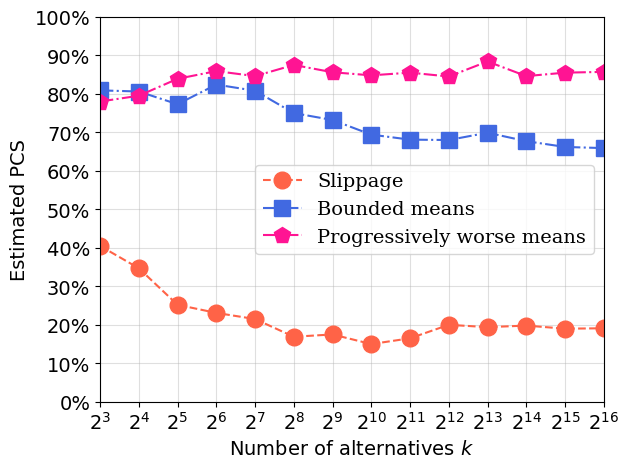

In [8]:
powers = np.arange(min_power, max_power+1)

# tomato
# royalblue
# violet

colors = ["tomato" ,"royalblue",  "deeppink", "g", "c"]
markers = ["o", "s",  "p", "*", "D", "p"]
line_styles = ["--", "-.", "-.", "--"]
fontsize = 14
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
fig = plt.figure(figsize=(6.5, 5))

for i, result in enumerate(results[:4]):
    plt.plot(powers, result, line_styles[i], marker=markers[i], markersize=12,  color=colors[i], label=labels[i])

plt.xlim(min_power, max_power)
xticks = np.arange(min_power, max_power+1)
xticklabels = ["2^{"+str(power)+"}" for power in xticks]
#xticklabels = [str(2 ** (power)) for power in xticks]
xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
plt.xticks(powers, xticklabels,fontsize=fontsize)

min_result = np.min(results)
max_result = np.max(results)

min_level = (min_result // 0.1-1)*0.1
max_level = (max_result // 0.1 + 1)*0.1

plt.ylim(0,1.0)
yticks = np.arange(0.,1+0.1, 0.1)
yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
plt.yticks(yticks, yticklabels, fontsize=fontsize)

plt.legend(prop={'family': 'serif',"size":fontsize})
plt.xlabel("Number of alternatives $k$", size=fontsize)
plt.ylabel("Estimated PCS", size=fontsize)
# plt.title("Problem 1")
plt.grid(alpha=0.4)
plt.savefig("Figure_EC6.pdf", bbox_inches ="tight")
plt.show()